In [1]:
library(latex2exp)

Warning message:
"Paket 'latex2exp' wurde unter R Version 4.2.3 erstellt"


# Data examination

In a first step we present a concise overview table over the correlation lenght data.

In [2]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")

bin_size <- 16

d <- results[, c("index", "t", "temp", "comptype")]
colnames(d) <- c("index", "L", "temp", "info")

corr12 <- c()
corr12_err <- c()
for (index in d$index) {
	len <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_len.csv", sep = ""), header = TRUE, sep = ",")
	#corr12 <- append(corr12, len$corr12[len$bin_size == bin_size])
	corr12_err <- append(corr12_err, len$corr12_err[len$bin_size == bin_size])

	fit <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_fits.csv", sep = ""), header = TRUE, sep = ",")
	corr12 <- append(corr12, fit$corr[fit$bin_size == bin_size])
}
d$corr12 <- corr12
d$corr12_err <- corr12_err
d$corr12_err_perc <- d$corr12_err / d$corr12
d$corr_beta_ratio <- d$corr12 / d$L

d <- d[order(d$temp), ]

results <- d

d16 <- d[d$L == 16
	& d$temp >= 0.25 & d$temp <= 0.3
	, ]
d24 <- d[d$L == 24
	& d$temp >= 0.2225 & d$temp <= 0.3
	, ]
d36 <- d[d$L == 36
	#& d$temp >= 0.215 & d$temp <= 0.3
	, ]
d54 <- d[d$L == 54
	#& d$temp >= 0.20 & d$temp <= 0.24
	, ]

d16
d24
d36
d54

comp <- rbind(d16, d24, d36, d54)

,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
12,11,16,0.2500,100 Metropolis Simulations,17.302928,1.28178084,0.074078839,1.0814330
13,12,16,0.2525,100 Metropolis Simulations,15.333939,0.73289488,0.047795605,0.9583712
14,13,16,0.2550,100 Metropolis Simulations,13.501394,0.57356266,0.042481738,0.8438371
15,14,16,0.2575,100 Metropolis Simulations,12.519100,0.45241424,0.036137921,0.7824437
16,15,16,0.2600,100 Metropolis Simulations,11.954016,0.41082645,0.034367233,0.7471260
76,760,16,0.2625,100 Metropolis Simulations,11.240350,0.35138569,0.031261098,0.7025219
17,16,16,0.2650,100 Metropolis Simulations,10.400816,0.28368438,0.027275205,0.6500510
77,761,16,0.2675,100 Metropolis Simulations,9.685123,0.23339761,0.024098571,0.6053202
18,17,16,0.2700,100 Metropolis Simulations,8.970981,0.17526041,0.019536371,0.5606863


,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
103,4284,24,0.2225,40 Metropolis Simulations,33.284860,7.99436940,0.240180351,1.3868692
22,192,24,0.2250,50 Metropolis Simulations,31.261820,6.17542506,0.197538886,1.3025758
104,4286,24,0.2275,210 Metropolis Simulations,26.106638,1.98688736,0.076106597,1.0877766
23,193,24,0.2300,170 Metropolis Simulations,25.487636,1.95991837,0.076896827,1.0619848
105,5003,24,0.2325,120 Metropolis Simulations,22.577674,1.76122166,0.078007222,0.9407364
24,195,24,0.2350,100 Metropolis Simulations,19.584538,1.08346357,0.055322398,0.8160224
25,196,24,0.2375,100 Metropolis Simulations,18.580675,1.10635734,0.059543441,0.7741948
26,197,24,0.2400,83 Metropolis Simulations,16.714667,0.79052755,0.047295442,0.6964444
27,198,24,0.2425,83 Metropolis Simulations,15.671977,0.60415243,0.038549854,0.6529990


,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
126,5448,36,0.2000,1 Metropolis Simulations,1.354195e+05,3.422183e+04,0.25270975,3761.6526873
38,380,36,0.2100,21 Metropolis Simulations,3.617856e+01,1.466894e+01,0.40545957,1.0049600
100,4074,36,0.2125,90 Metropolis Simulations,3.308814e+01,2.904076e+00,0.08776789,0.9191151
101,4075,36,0.2150,90 Metropolis Simulations,3.127501e+01,3.435244e+00,0.10983993,0.8687502
102,4076,36,0.2175,90 Metropolis Simulations,2.748491e+01,2.069170e+00,0.07528386,0.7634698
39,381,36,0.2200,91 Metropolis Simulations,2.531694e+01,1.409432e+00,0.05567153,0.7032482
90,1201,36,0.2225,120 Metropolis Simulations,2.318655e+01,1.116190e+00,0.04813956,0.6440707
40,382,36,0.2250,30 Metropolis Simulations,2.042707e+01,1.475384e+00,0.07222692,0.5674185
91,1203,36,0.2275,20 Metropolis Simulations,1.844076e+01,1.180317e+00,0.06400587,0.5122432


,index,L,temp,info,corr12,corr12_err,corr12_err_perc,corr_beta_ratio
,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
57,570,54,0.2100,30 Metropolis Simulations,28.939522,2.1035939,0.07268931,0.5359171
128,5605,54,0.2125,40 Metropolis Simulations,25.745092,1.3732073,0.05333860,0.4767610
129,5606,54,0.2150,20 Metropolis Simulations,25.792618,2.1997881,0.08528751,0.4776411
130,5607,54,0.2175,20 Metropolis Simulations,24.284108,1.9793370,0.08150750,0.4497057
58,571,54,0.2200,23 Metropolis Simulations,20.221820,1.1124606,0.05501288,0.3744781
131,5617,54,0.2225,13 Metropolis Simulations,21.238591,1.2901866,0.06074728,0.3933072
59,572,54,0.2250,23 Metropolis Simulations,18.413336,0.8049644,0.04371638,0.3409877
132,5619,54,0.2275,13 Metropolis Simulations,16.764364,0.9312613,0.05555005,0.3104512
60,573,54,0.2300,23 Metropolis Simulations,15.733208,0.4617269,0.02934728,0.2913557


## Compounded correlation lengths

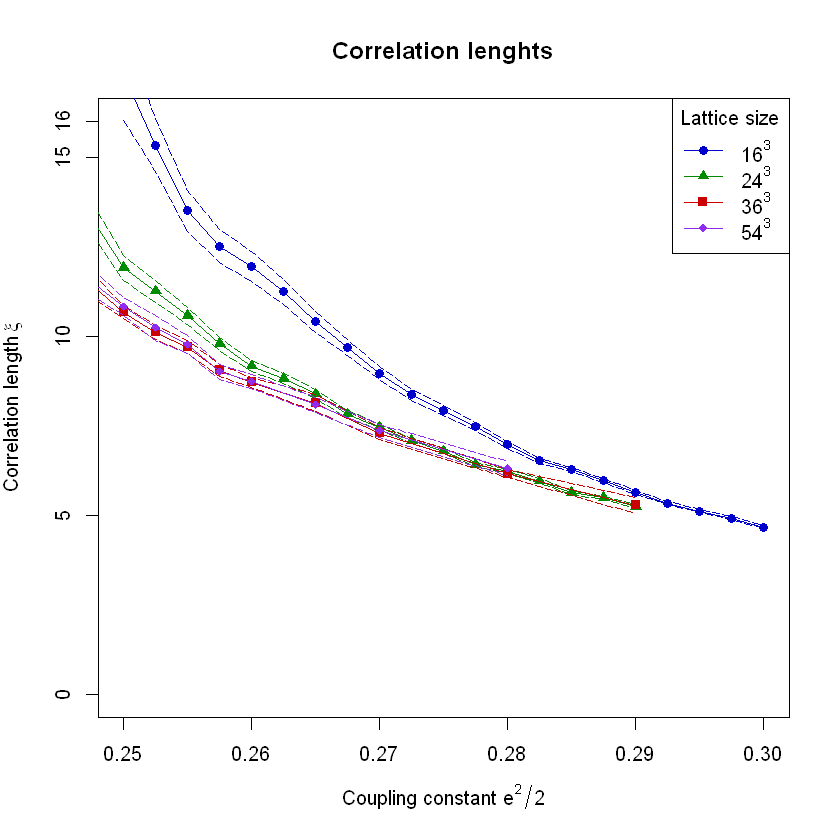

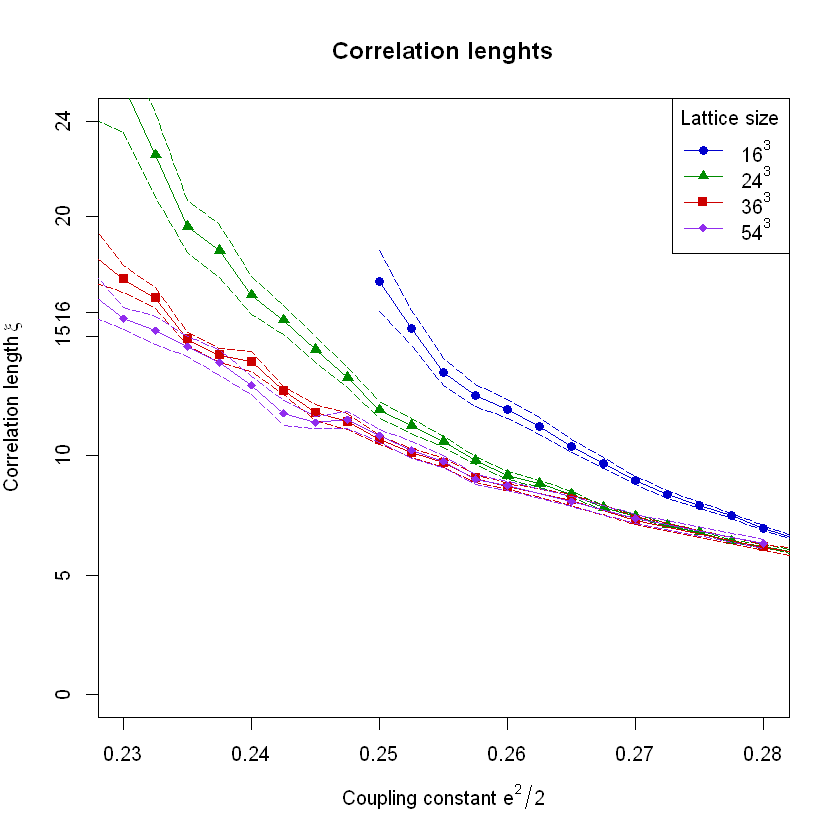

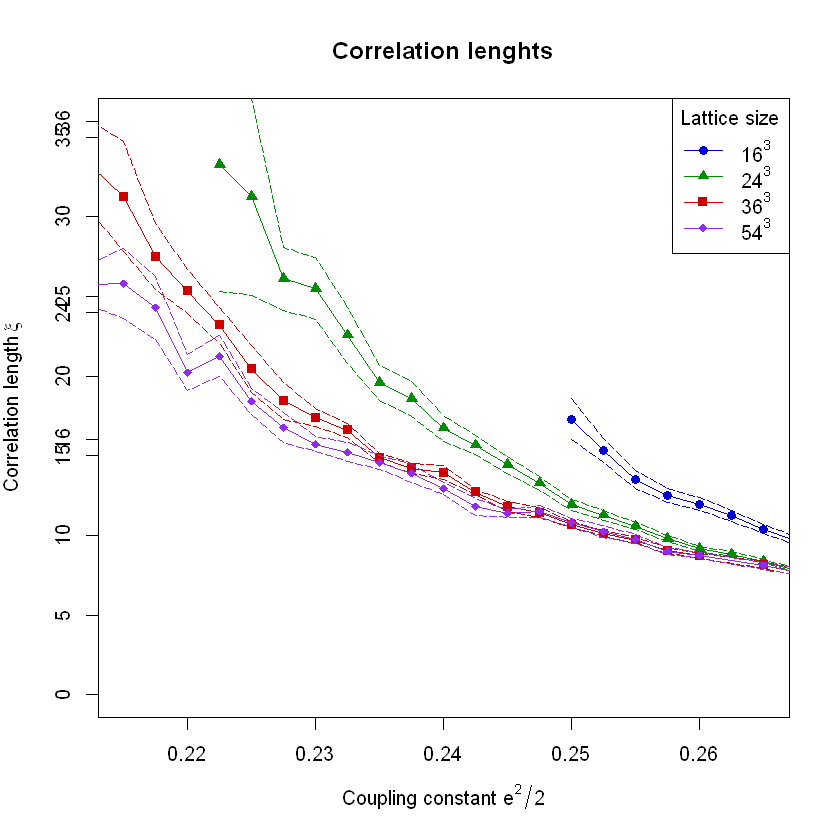

png 
  2

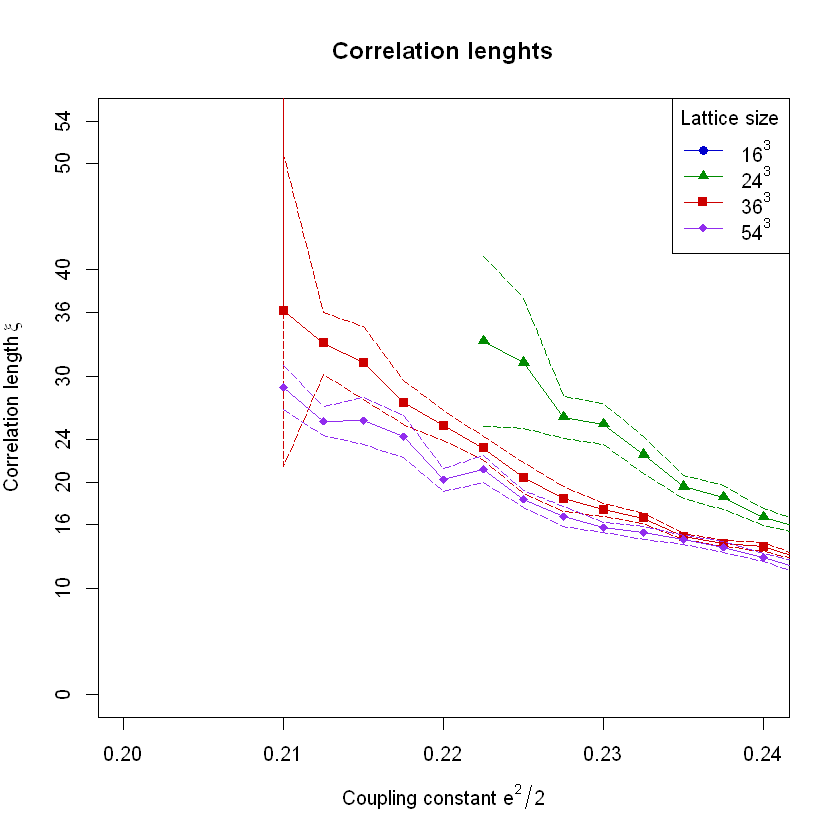

In [3]:
sizes <- c(16, 24 ,36, 54)
lower_xlim <- c(0.25, 0.23, 0.215, 0.2)
upper_xlim <- c(0.3, 0.28, 0.265, 0.24)
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)

correlation_length_plot <- function(xlim, size, dotted_lines) {
	plot(NULL, xlim = xlim, ylim = c(0, size), xlab = TeX("Coupling constant $e^2 / 2$"), ylab = TeX("Correlation length $\\xi$"))

	if (dotted_lines) for (x in sizes) lines(c(0, 1), c(x, x), lty = 3, col = adjustcolor("black", alpha.f = 0.8))

	for (i in 1:4) {
		size <- sizes[i]
		col <- cols[i]
		d <- comp[comp$L == size, c("L", "temp", "corr12", "corr12_err")]
		upper <- d$corr12 + d$corr12_err
		lower <- d$corr12 - d$corr12_err
		lines(d$temp, upper, lty = 5, col = col)
		lines(d$temp, lower, lty = 5, col = col)
		points(corr12 ~ temp, data = d, col = col, pch = pchs[i])
		lines(corr12 ~ temp, data = d, col = col)
		axis(2, at = c(size), labels = c(size))
	}

	legend("topright", legend = TeX(paste("$", sizes, "^3$", sep = "")), col = cols, lty = c(1, 1, 1, 1), pch = pchs, title = "Lattice size")
	title(paste("Correlation lenghts"))	
}

for (i in 1:4) {
	size <- sizes[i]
	xlim <- c(lower_xlim[i], upper_xlim[i])
	
	correlation_length_plot(xlim, size, FALSE)
}

png(filename = paste("plots\\correlation_length_plot.png", sep = ""),
	width = 1440, height = 1440, type = c("cairo-png"), res = 200)
correlation_length_plot(c(0.21, 0.29), 45, TRUE)
dev.off()

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

In [4]:
# Loading data
d <- comp[, c("index", "L", "temp", "corr12", "corr12_err_perc")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$L
d$corr_beta_ratio_err_perc <- d$corr12_err_perc
d$corr_beta_ratio_err <- d$corr_beta_ratio * d$corr_beta_ratio_err_perc

d$corr12_15 <- 0
d$corr12_15_err_perc <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$L[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$L,
		ifelse(my_temp %in% d$temp[d$L == next_size],
		d$corr12[d$temp == my_temp & d$L == next_size][1], 0), 0)
	d$corr12_15_err_perc[i] <- ifelse(next_size %in% d$L,
		ifelse(my_temp %in% d$temp[d$L == next_size],
		d$corr12_err_perc[d$temp == my_temp & d$L == next_size][1], 0), 0)
}
d <- d[d$corr12_15 != 0, ]
d$corr_step_ratio <- d$corr12_15 / d$corr12
d$corr_step_ratio_err_perc <- d$corr12_err_perc + d$corr12_15_err_perc

d$corr_step_ratio_err <- d$corr_step_ratio * d$corr_step_ratio_err_perc

d <- d[d$corr12 <= d$L, ]

d16 <- d[d$L == 16, ]
d24 <- d[d$L == 24, ]
d36 <- d[d$L == 36, ]

#d16 <- d16[d16$temp >= 0.26 & d16$temp <= 0.40, ]
#d24 <- d24[d24$temp >= 0.24 & d24$temp <= 0.37, ]
#d36 <- d36[d36$temp >= 0.23 & d36$temp <= 0.31, ]

d16
d24
d36

dat <- rbind(d16, d24, d36)

,index,L,temp,corr12,corr12_err_perc,corr_beta_ratio,corr_beta_ratio_err_perc,corr_beta_ratio_err,corr12_15,corr12_15_err_perc,corr_step_ratio,corr_step_ratio_err_perc,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,12,16,0.2525,15.333939,0.047795605,0.9583712,0.047795605,0.045805930,11.258120,0.027365584,0.7341962,0.07516119,0.05518306
14,13,16,0.2550,13.501394,0.042481738,0.8438371,0.042481738,0.035847666,10.577513,0.022362264,0.7834386,0.06484400,0.05080129
15,14,16,0.2575,12.519100,0.036137921,0.7824437,0.036137921,0.028275890,9.797600,0.018717022,0.7826122,0.05485494,0.04293015
16,15,16,0.2600,11.954016,0.034367233,0.7471260,0.034367233,0.025676653,9.167640,0.017500245,0.7669088,0.05186748,0.03977763
76,760,16,0.2625,11.240350,0.031261098,0.7025219,0.031261098,0.021961606,8.820013,0.016029598,0.7846742,0.04729070,0.03710779
17,16,16,0.2650,10.400816,0.027275205,0.6500510,0.027275205,0.017730274,8.390724,0.014885554,0.8067371,0.04216076,0.03401265
77,761,16,0.2675,9.685123,0.024098571,0.6053202,0.024098571,0.014587351,7.819669,0.012759241,0.8073898,0.03685781,0.02975862
18,17,16,0.2700,8.970981,0.019536371,0.5606863,0.019536371,0.010953775,7.466964,0.009819195,0.8323464,0.02935557,0.02443400
78,762,16,0.2725,8.370061,0.018748293,0.5231288,0.018748293,0.009807772,7.086287,0.009523238,0.8466231,0.02827153,0.02393533


,index,L,temp,corr12,corr12_err_perc,corr_beta_ratio,corr_beta_ratio_err_perc,corr_beta_ratio_err,corr12_15,corr12_15_err_perc,corr_step_ratio,corr_step_ratio_err_perc,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
105,5003,24,0.2325,22.577674,0.078007222,0.9407364,0.078007222,0.073384236,16.604223,0.02639979,0.7354266,0.10440702,0.07678370
24,195,24,0.2350,19.584538,0.055322398,0.8160224,0.055322398,0.045144316,14.881501,0.01864543,0.7598597,0.07396783,0.05620517
25,196,24,0.2375,18.580675,0.059543441,0.7741948,0.059543441,0.046098222,14.207243,0.02041719,0.7646247,0.07996063,0.06113987
26,197,24,0.2400,16.714667,0.047295442,0.6964444,0.047295442,0.032938648,13.940431,0.03109164,0.8340239,0.07838708,0.06537670
27,198,24,0.2425,15.671977,0.038549854,0.6529990,0.038549854,0.025173018,12.725306,0.01413008,0.8119783,0.05267994,0.04277497
28,199,24,0.2450,14.446509,0.036841060,0.6019379,0.036841060,0.022176029,11.807020,0.02730358,0.8172923,0.06414464,0.05242492
29,200,24,0.2475,13.269687,0.032484867,0.5529036,0.032484867,0.017961001,11.429775,0.02913410,0.8613447,0.06161896,0.05307517
30,201,24,0.2500,11.911426,0.029238005,0.4963094,0.029238005,0.014511097,10.678854,0.01770706,0.8965219,0.04694507,0.04208728
31,202,24,0.2525,11.258120,0.027365584,0.4690884,0.027365584,0.012836877,10.117634,0.01924235,0.8986966,0.04660794,0.04188639


,index,L,temp,corr12,corr12_err_perc,corr_beta_ratio,corr_beta_ratio_err_perc,corr_beta_ratio_err,corr12_15,corr12_15_err_perc,corr_step_ratio,corr_step_ratio_err_perc,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,4074,36,0.2125,33.088142,0.08776789,0.9191151,0.08776789,0.080668788,25.745092,0.05333860,0.7780761,0.14110649,0.10979159
101,4075,36,0.2150,31.275007,0.10983993,0.8687502,0.10983993,0.095423456,25.792618,0.08528751,0.8247039,0.19512743,0.16092234
102,4076,36,0.2175,27.484913,0.07528386,0.7634698,0.07528386,0.057476952,24.284108,0.08150750,0.8835432,0.15679136,0.13853194
39,381,36,0.2200,25.316937,0.05567153,0.7032482,0.05567153,0.039150902,20.221820,0.05501288,0.7987467,0.11068441,0.08840881
90,1201,36,0.2225,23.186546,0.04813956,0.6440707,0.04813956,0.031005278,21.238591,0.06074728,0.9159877,0.10888684,0.09973900
40,382,36,0.2250,20.427068,0.07222692,0.5674185,0.07222692,0.040982892,18.413336,0.04371638,0.9014185,0.11594330,0.10451343
91,1203,36,0.2275,18.440756,0.06400587,0.5122432,0.06400587,0.032786574,16.764364,0.05555005,0.9090931,0.11955592,0.10868746
41,383,36,0.2300,17.395125,0.03317121,0.4831979,0.03317121,0.016028260,15.733208,0.02934728,0.9044607,0.06251849,0.05654552
42,384,36,0.2325,16.604223,0.02639979,0.4612284,0.02639979,0.012176335,15.233851,0.03831538,0.9174685,0.06471518,0.05937413


In [5]:
build_polygon_from_points_with_errors <- function(x, x_err, y, y_err, col) {
	d <- data.frame(x, x_err, y, y_err)
	d <- d[order(d$x), ]

	show(d)

	# Initialize the arrays
	x_top_ary <- c(d$x[1] - d$x_err[1], d$x[1] + d$x_err[1])
	y_top_ary <- c(d$y[1] + d$y_err[1], d$y[1] + d$y_err[1])
	x_bot_ary <- c(d$x[1] - d$x_err[1], d$x[1] + d$x_err[1])
	y_bot_ary <- c(d$y[1] - d$y_err[1], d$y[1] - d$y_err[1])

	for (i in 2:length(x)) {
		x_top_ary <- append(x_top_ary, c(d$x[i] - d$x_err[i], d$x[i] + d$x_err[i]))
		y_top_ary <- append(y_top_ary, c(d$y[i] + d$y_err[i], d$y[i] + d$y_err[i]))
		x_bot_ary <- append(x_bot_ary, c(d$x[i] - d$x_err[i], d$x[i] + d$x_err[i]))
		y_bot_ary <- append(y_bot_ary, c(d$y[i] - d$y_err[i], d$y[i] - d$y_err[i]))
	}

	# Make it such that the arrays are increasing
	top <- data.frame(list(x = x_top_ary, y = y_top_ary))
	bot <- data.frame(list(x = x_bot_ary, y = y_bot_ary))

	top$include <- TRUE
	bot$include <- TRUE

	for (i in 1:nrow(d)) {
		margin <- 0.9
		above <- d$y[i] + d$y_err[i] * margin
		right <- d$x[i] + d$x_err[i] * margin
		below <- d$y[i] - d$y_err[i] * margin
		left <- d$x[i] - d$x_err[i] * margin

		top$include <- top$include & (top$y > above | top$x > right | top$y < below | top$x < left)
		bot$include <- bot$include & (bot$y > above | bot$x > right | bot$y < below | bot$x < left)
	}

	show(top)
	show(bot)

	top <- top[top$include, ]
	bot <- bot[bot$include, ]

	

	polygon(append(top$x, rev(bot$x)), append(top$y, rev(bot$y)),
	col = col, lty = 0)
}

In [6]:
build_square_err_around_points <- function(x, x_err, y, y_err, col) {
	d <- data.frame(x, x_err, y, y_err)

	for (i in 1:nrow(d)) {
		x_ary <- c(d$x[i] - d$x_err[i], d$x[i] + d$x_err[i], d$x[i] + d$x_err[i], d$x[i] - d$x_err[i])
		y_ary <- c(d$y[i] + d$y_err[i], d$y[i] + d$y_err[i], d$y[i] - d$y_err[i], d$y[i] - d$y_err[i])

		polygon(x_ary, y_ary, col = col, lty = 0)
	}
}

In [7]:
png(filename = "plots\\step_scaling_function.png", width = 1440, height = 1440, type = c("cairo-png"), res = 200)
plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d16,
	col = "blue3",
	type = "o",
	pch = 19,
	xlim = c(0.4, 1.0),
	ylim = c(0.5, 1.1),
	xlab = TeX("$\\xi(L) / L$"),
	ylab = TeX("$\\xi(1.5L) / \\xi(L)$")
)
build_square_err_around_points(d16$corr_beta_ratio, d16$corr_beta_ratio_err, d16$corr_step_ratio, d16$corr_step_ratio_err, adjustcolor("blue3", alpha.f = 0.2))
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 17)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 17)
	if(TRUE) build_square_err_around_points(d24$corr_beta_ratio, d24$corr_beta_ratio_err, d24$corr_step_ratio, d24$corr_step_ratio_err, adjustcolor("green4", alpha.f = 0.2))
}
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 15)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 15)
	if(TRUE) build_square_err_around_points(d36$corr_beta_ratio, d36$corr_beta_ratio_err, d36$corr_step_ratio, d36$corr_step_ratio_err, adjustcolor("red3", alpha.f = 0.2))
}
title("1.5-step-scaling function")
legend("topright", y = c(TeX("$16^3$"), TeX("$24^3$"), TeX("$36^3$")), lty = c(1, 1, 1), pch = c(19, 17, 15), col = c("blue3", "green4", "red3"), title = "Lattice size")
points(d$corr_beta_ratio[d$temp == 0.26], d$corr_step_ratio[d$temp == 0.26])
lines(c(0, 1), c(1, 1), lty = 3, col = adjustcolor("black", alpha.f = 0.8))
dev.off()

png 
  2

## Compounded correlation function plots

In [8]:
indices <- c(15, 1390, 195, 205, 381, 387, 5123, 5142)
for (index in indices) {

	res <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_res.csv", sep = ""), header = FALSE)
	err <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_err.csv", sep = ""), header = FALSE)
	fit <- read.csv(paste("..\\data\\comp_correlation_stats\\correlation_", index, "_fits.csv", sep = ""), header = TRUE)

	d <- data.frame(unname(unlist(res[res$V1 == bin_size, -1])))
	colnames(d) <- c("corr_fn")

	d$corr_fn_err <- unname(unlist(err[err$V1 == bin_size, -1]))
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$bin_size == bin_size, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b

	png(filename = paste("plots\\correlation_function_plot_", index, ".png", sep = ""), width = 1440, height = 1440, res = 270, type = "cairo-png")
	plot(d$index, d$corr_fn, xlab = "t", ylab = "Correlation function C(t)")
	title(TeX(paste("Correlation function on a $", results$L[results$index == index], "^3$ lattice", sep = ""), bold = TRUE))
	legend("top", legend = TeX(paste("$e^2 / 2 =$ ", round(results$temp[results$index == index],  digits = 4),
		", $\\xi =$ ", round(results$corr12[results$index == index], digits = 2),
		", $\\sigma =$ ", round(results$corr12_err[results$index == index], digits = 2), sep = "")), box.lty = 0)
	box()

	d$upper <- d$corr_fn + d$corr_fn_err
	d$lower <- d$corr_fn - d$corr_fn_err
	y_shade <- c()
	for (entry in d$upper) {
		y_shade <- append(y_shade, entry)
	}
	for (entry in rev(d$lower)) {
		y_shade <- append(y_shade, entry)
	}
	x_shade <- c(d$index, rev(d$index))
	polygon(x_shade, y_shade, col = "lightgray", lty = 0)
	points(d$index, d$corr_fn)
	lines(d$index, d$fit)
	dev.off()
}